# Topic 2.3 – Multiple Linear Regression (Advertising Dataset)

This notebook applies **multiple linear regression** to a real-world business dataset.

It builds on:
- Topic 2.1 – Simple Linear Regression
- Topic 2.2 – Train/Test Split and Validation

In this notebook, we will:
- load and inspect a real dataset
- define multiple independent variables
- train a multiple linear regression model
- interpret regression coefficients
- evaluate model performance using a train/test split

## Business Context

The dataset contains advertising budgets and corresponding sales figures.

Independent variables:
- TV advertising budget
- Radio advertising budget
- Newspaper advertising budget

Dependent variable:
- Sales

The business question is:
“How do different advertising channels influence sales?”


## Import Required Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Load the Dataset

In [39]:
df = pd.read_csv("../datasets/raw/Topic2/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Inspecting the Dataset

Before modeling, we inspect the structure and data types.

In [40]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

## Features and Target

We separate the dataset into:
- `X` – independent variables (advertising channels)
- `y` – dependent variable (sales)

In [41]:
X = df[["TV", "radio", "newspaper"]]
y = df["sales"]

print(X.head())
print()
print(y.head())

      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64


## Train/Test Split

We split the data into training and test sets to evaluate generalization.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## Training the Model

We train a multiple linear regression model using the training data.


In [43]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

## Model Parameters

Each coefficient represents the effect of one advertising channel on sales,
assuming the other variables remain constant.

In [44]:
coefficients = pd.Series(linreg.coef_, index=X.columns)
intercept = linreg.intercept_

print("Intercept:", intercept)
coefficients

Intercept: 2.70894909251591


TV           0.044059
radio        0.199287
newspaper    0.006882
dtype: float64

## Interpreting the Coefficients

- A positive coefficient means higher budget is associated with higher sales
- Larger absolute values indicate stronger influence
- Interpretation assumes other variables are held constant

## Making Predictions

We generate predictions for both training and test data.


In [45]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

## Model Evaluation

We evaluate the model using R² on training and test data.


In [46]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² (training): {r2_train:.4f}")
print(f"R² (test):     {r2_test:.4f}")

R² (training): 0.9055
R² (test):     0.8609


## Limitations

- Linear regression assumes linear relationships
- It does not capture interactions or nonlinear effects
- Correlated features may affect coefficient interpretation

## Model Visualization

In multiple linear regression, the model cannot be visualized as a single line.

Instead, we use:
- actual vs predicted plots
- feature-wise scatter plots

to assess model quality and relationships.

## Actual vs Predicted Sales (Test Data)

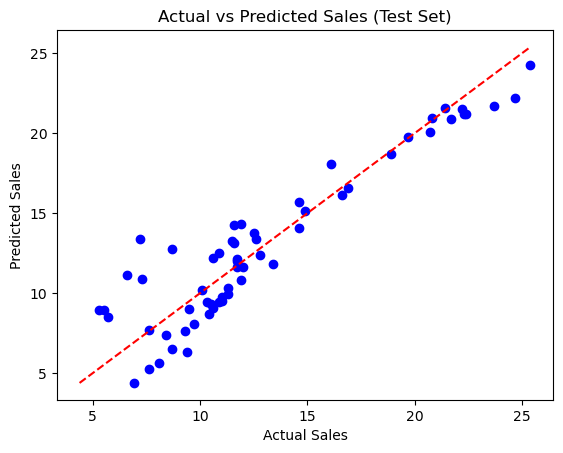

In [47]:
plt.scatter(y_test, y_test_pred, color="blue")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Test Set)")

# Reference line: perfect prediction
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")

plt.show()

## Feature-wise Relationships

We now visualize the relationship between each advertising channel and sales individually.

## TV Advertising vs Sales

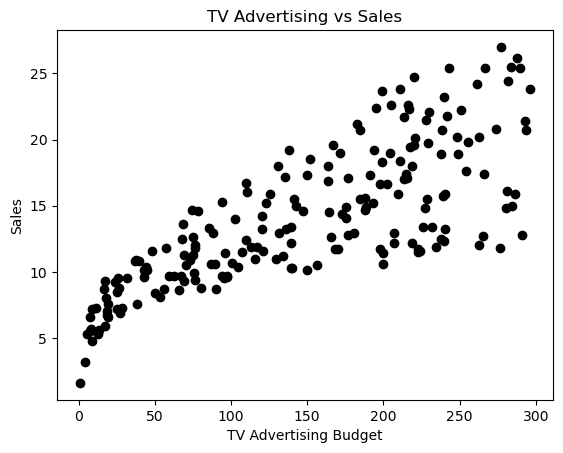

In [48]:
plt.scatter(df["TV"], df["sales"], color="black")
plt.xlabel("TV Advertising Budget")
plt.ylabel("Sales")
plt.title("TV Advertising vs Sales")
plt.show()

## Radio Advertising vs Sales

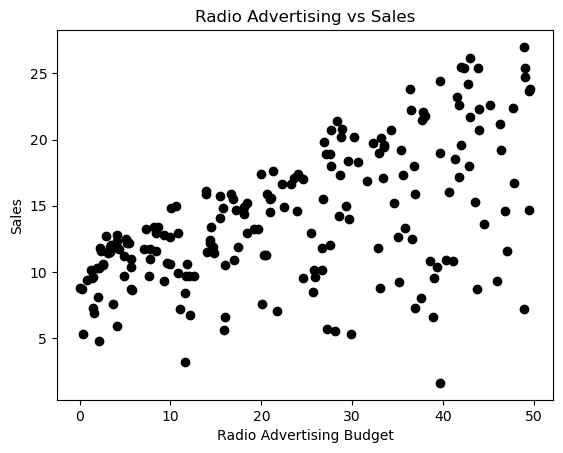

In [49]:
plt.scatter(df["radio"], df["sales"], color="black")
plt.xlabel("Radio Advertising Budget")
plt.ylabel("Sales")
plt.title("Radio Advertising vs Sales")
plt.show()

## Newspaper Advertising vs Sales

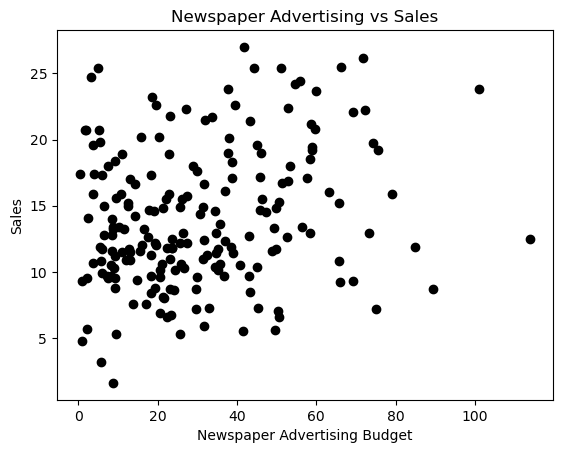

In [50]:
plt.scatter(df["newspaper"], df["sales"], color="black")
plt.xlabel("Newspaper Advertising Budget")
plt.ylabel("Sales")
plt.title("Newspaper Advertising vs Sales")
plt.show()

## Interpreting the Visualizations

- TV and Radio show clearer linear relationships with Sales
- Newspaper shows a weaker or noisier relationship
- These visual patterns are reflected in the regression coefficients

Visualization helps validate and interpret model results.

## Final Takeaway

Multiple linear regression allows us to:
- model complex relationships using multiple predictors
- interpret effects in a business context
- support data-driven decision-making

This completes Topic 2.